In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import symbols, diff, lambdify, sympify

### Определение тестовых функций и их градиентов

In [2]:
# Бута
def booth_function(x, y):
    return (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2

def booth_gradient(x, y):
    grad_x = 2 * (x + 2 * y - 7) + 4 * (2 * x + y - 5)
    grad_y = 4 * (x + 2 * y - 7) + 2 * (2 * x + y - 5)
    return np.array([grad_x, grad_y])

# Матиаса
def matyas_function(x, y):
    return 0.26 * (x ** 2 + y ** 2) - 0.48 * x * y

def matyas_gradient(x, y):
    grad_x = 0.52 * x - 0.48 * y
    grad_y = 0.52 * y - 0.48 * x
    return np.array([grad_x, grad_y])


### Градиентный спуск

In [3]:
def gradient_descent(grad_func, init_point, learning_rate=0.01, tolerance=1e-6, max_iter=1000):
    x = np.array(init_point, dtype=float)
    history = [x.copy()]
    for _ in range(max_iter):
        grad = np.array(grad_func(*x))
        x -= learning_rate * grad
        history.append(x.copy())
        if np.linalg.norm(grad) < tolerance:
            break
    return x, history


### Визуализация

In [4]:
def plot_function_and_path(func, history, analytical_min, x_range=(-10, 10), y_range=(-10, 10)):
    x = np.linspace(*x_range, 100)
    y = np.linspace(*y_range, 100)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

    history = np.array(history)
    ax.plot(history[:, 0], history[:, 1], [func(x, y) for x, y in history], color='red', marker='o')
    ax.scatter(*analytical_min, func(*analytical_min), color='blue', label='Аналитический минимум', s=100)

    ax.set_title("Путь")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.legend()
    plt.show()


### Анимация пути

In [5]:
def animate_path(func, history, analytical_min, x_range=(-10, 10), y_range=(-10, 10)):
    x = np.linspace(*x_range, 100)
    y = np.linspace(*y_range, 100)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    fig, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(contour)

    history = np.array(history)
    path, = ax.plot([], [], color='red', marker='o', label='Path')
    ax.scatter(*analytical_min, color='blue', label='Аналитический минимум', s=100)
    ax.legend()

    def update(frame):
        path.set_data(history[:frame, 0], history[:frame, 1])
        return path,

    ani = FuncAnimation(fig, update, frames=len(history), interval=100, blit=True)
    plt.show()
    return ani


### Проверка погрешности и запуск оптимизации

=== Функция Бута ===
Найденное решение: [1.00034308 2.99965692]
Аналитическое решение: [1 3]
Error: 0.00048519501961859695



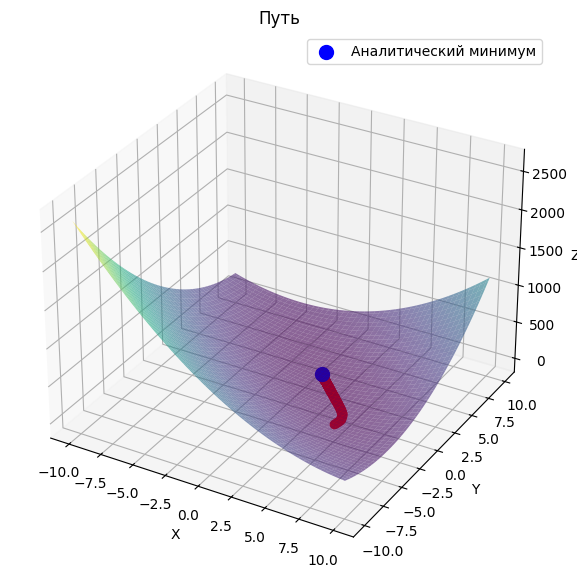

=== Функция Матиаса ===
Найденное решение: [0.02271164 0.02271164]
Аналитическое решение: [0 0]
Error: 0.032119104955231764



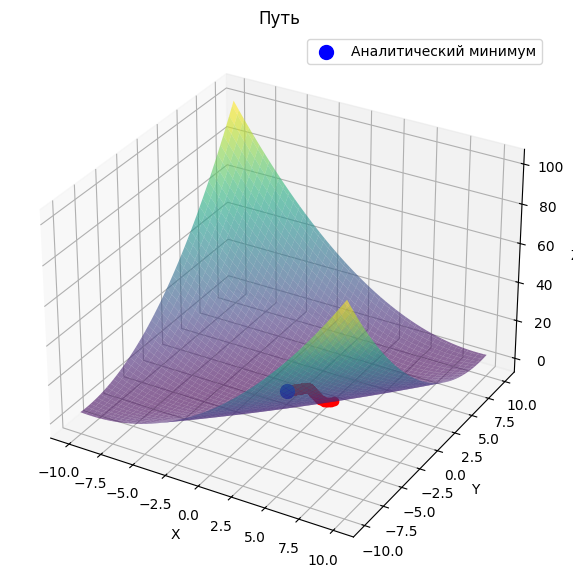

In [6]:
init_point = [5, -2.5]
tolerance = 1e-3
max_iter = 1000

functions = [
    {
        "func": booth_function,
        "grad": booth_gradient,
        "analytical_min": [1, 3],
        "name": "Функция Бута",
        "learning_rate": 0.01
    },
    {
        "func": matyas_function,
        "grad": matyas_gradient,
        "analytical_min": [0, 0],
        "name": "Функция Матиаса",
        "learning_rate": 0.1
    },
]
for f in functions:
    opt_point, history = gradient_descent(
        f["grad"],
        init_point,
        f["learning_rate"],
        tolerance,
        max_iter,
    )

    analytical_min = np.array(f["analytical_min"])
    error = np.linalg.norm(opt_point - analytical_min)

    print(f"=== {f['name']} ===")
    print(f"Найденное решение: {opt_point}")
    print(f"Аналитическое решение: {analytical_min}")
    print(f"Error: {error}\n")

    plot_function_and_path(f["func"], history, analytical_min)


### Модификация градиентного спуска с моментную и адаптивной модификацией


In [7]:
# Моментный 
def gradient_descent_momentum(grad_func, init_point, learning_rate=0.01, momentum=0.9, tolerance=1e-6, max_iter=1000):
    x = np.array(init_point, dtype=float)
    v = np.zeros_like(x)  # Скорость
    history = [x.copy()]

    for _ in range(max_iter):
        grad = np.array(grad_func(*x))
        v = momentum * v + learning_rate * grad  # Добавьте импульс
        x -= v  # Обновить параметры
        history.append(x.copy())

        if np.linalg.norm(grad) < tolerance:
            break

    return x, history

# AdaGrad
def gradient_descent_adagrad(grad_func, init_point, learning_rate=0.01, epsilon=1e-8, tolerance=1e-6, max_iter=1000):
    x = np.array(init_point, dtype=float)
    G = np.zeros_like(x)  # Сумма квадратов градиентов
    history = [x.copy()]

    for _ in range(max_iter):
        grad = np.array(grad_func(*x))
        G += grad ** 2  # Обновление сумм квадратов
        adjusted_grad = grad / (np.sqrt(G) + epsilon)  # Градиент шкалы
        x -= learning_rate * adjusted_grad  # Обновление параметров
        history.append(x.copy())

        if np.linalg.norm(grad) < tolerance:
            break

    return x, history


### Применение методов с модификациями

=== Функция Бута ===
Метод: Моментный
Найденное решение: [0.99999984 3.00000036]
Аналитическое решение: [1 3]
Error: 3.907044279626367e-07



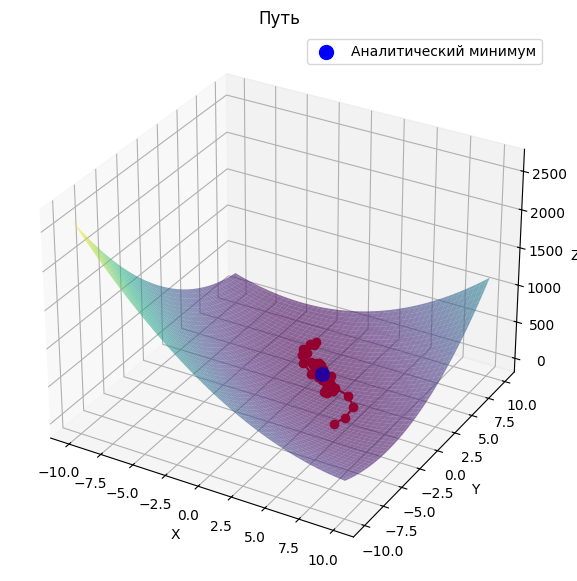

Метод: Адаптивный
Найденное решение: [1.00000025 2.9999997 ]
Аналитическое решение: [1 3]
Error: 3.8935660112938655e-07



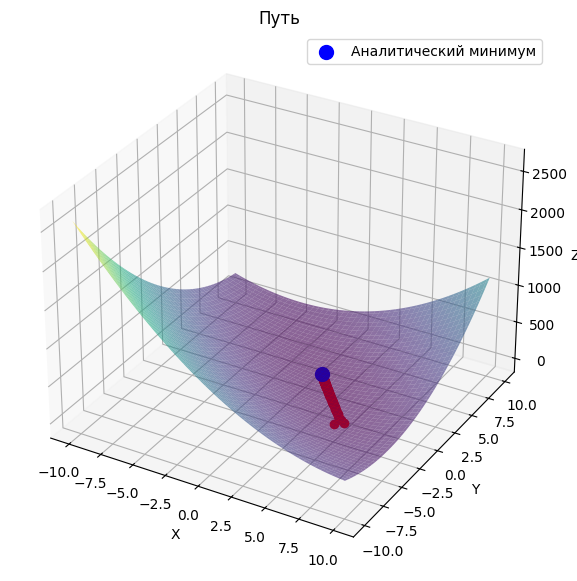

=== Функция Матиаса ===
Метод: Моментный
Найденное решение: [1.67971196e-05 1.67979170e-05]
Аналитическое решение: [0 0]
Error: 2.3755278199060057e-05



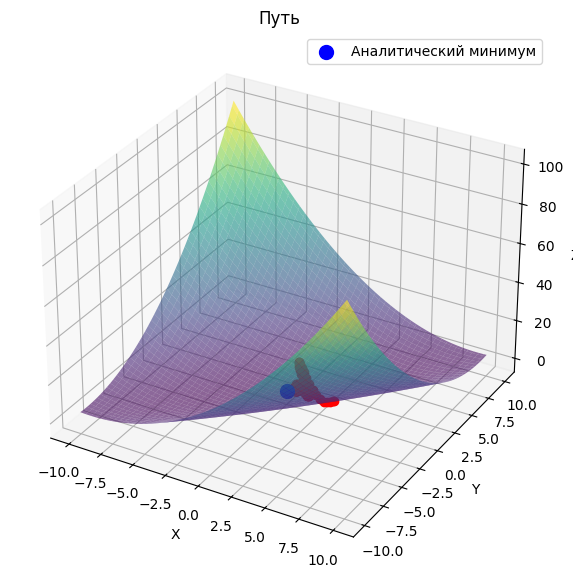

Метод: Адаптивный
Найденное решение: [0.16043287 0.16003714]
Аналитическое решение: [0 0]
Error: 0.22660669565757674



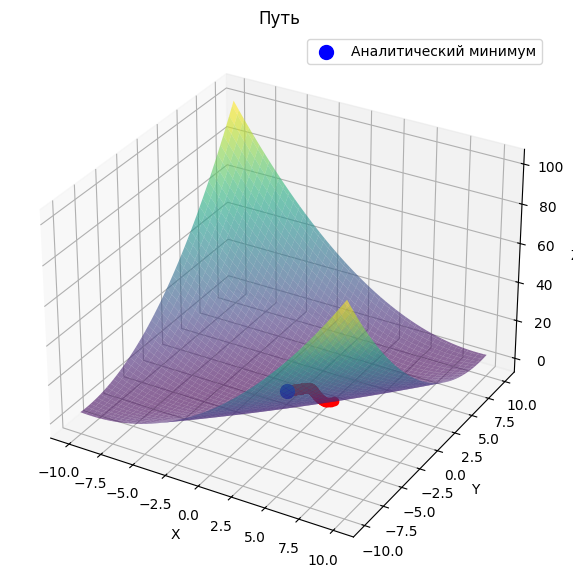

In [8]:
optimization_methods = [
    {
        "Метод": gradient_descent_momentum,
        "Название": "Моментный",
        "Параметры": {"learning_rate": 0.05, "momentum": 0.9}
    },
    {
        "Метод": gradient_descent_adagrad,
        "Название": "Адаптивный",
        "Параметры": {"learning_rate": 0.5}
    },
]

for f in functions:
    print(f"=== {f['name']} ===")

    for method in optimization_methods:
        opt_point, history = method["Метод"](
            f["grad"],
            init_point,
            **method["Параметры"]
        )

        analytical_min = np.array(f["analytical_min"])
        error = np.linalg.norm(opt_point - analytical_min)

        print(f"Метод: {method['Название']}")
        print(f"Найденное решение: {opt_point}")
        print(f"Аналитическое решение: {analytical_min}")
        print(f"Error: {error}\n")

        plot_function_and_path(f["func"], history, analytical_min)